# Naive Bayes

Los métodos de Naive Bayes son un conjunto de algoritmos de aprendizaje supervisado basados en la aplicación del teorema de Bayes con la suposición “ingenua” de independencia condicional entre cada par de características, dado el valor de la variable de clase.

El teorema de Bayes establece la relación de la variable de clase $y$ (vector de características dependientes ) con $x_{1}, ... x_{n}$ (vector de variables dependiente).

<font size="5"> $ P(y/x_{1}, ... , x_{n})= \frac{P(y)P(x_{1}, ... , x_{n}/y)}{P(x_{1}, ... x_{n})}$ </font>

### Ventajas 

1. Un manera fácil y rápida de predecir clases, para problemas de clasificación binarios y multiclase.
2. En los casos en que sea apropiada una presunción de independencia, el algoritmo se comporta mejor que otros modelos de clasificación, incluso con menos datos de entrenamiento.
3. El desacoplamiento de las distribuciones de características condicionales de clase significan que cada distribución puede ser estimada independientemente como si tuviera una sola dimensión. Esto ayuda con problemas derivados de la dimensionalidad y mejora el rendimiento.

### Desventajas 

1. Aunque son unos clasificadores bastante buenos, los algoritmos Naive Bayes son conocidos por ser pobres estimadores. Por ello, no se deben tomar muy en serio las probabilidades que se obtienen.
2. La presunción de independencia Naive muy probablemente no reflejará cómo son los datos en el mundo real.
3. Cuando el conjunto de datos de prueba tiene una característica que no ha sido observada en el conjunto de entrenamiento, el modelo le asignará una probabilidad de cero y será inútil realizar predicciones. Uno de los principales métodos para evitar esto, es la técnica de suavizado, siendo la estimación de Laplace una de las más populares.

1. https://medium.com/datos-y-ciencia/algoritmos-naive-bayes-fudamentos-e-implementaci%C3%B3n-4bcb24b307f
2. https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

## Implementación 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

### Carga de Librerías 

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import warnings
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

https://scikit-learn.org/stable/modules/naive_bayes.html

**Ruta**

In [2]:
ruta_input="C:/Users/Omar/Desktop/Omar/Temas data science/Bases/Credit car"

In [3]:
base_input=pd.read_excel(os.path.join(ruta_input,"default of credit card clients.xls"),header=1)

In [4]:
base_input.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
base_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**Renombramos dataset**

In [6]:
base_input=base_input.iloc[:,1:]

In [7]:
colum_base=["credito_otorgado($)","genero","educacion","estado_civil","edad","marca_pago_mes_6","marca_pago_mes_5",
            "marca_pago_mes_4","marca_pago_mes_3","marca_pago_mes_2","marca_pago_mes_1","estado_cuenta_mes_6($)",
            "estado_cuenta_mes_5($)","estado_cuenta_mes_4($)","estado_cuenta_mes_3($)","estado_cuenta_mes_2($)",
            "estado_cuenta_mes_1($)","monto_pago_anterior_6($)","monto_pago_anterior_5($)","monto_pago_anterior_4($)",
            "monto_pago_anterior_3($)","monto_pago_anterior_2($)","monto_pago_anterior_1($)","incumplimiento_sgte_mes"]

In [8]:
base_input.columns=colum_base

Como es el mismo ejemplo del modelo construido con regresión logística, vamos directo a la implementación del modelo.

**featuring engineering**

In [9]:
base_input.loc[base_input['genero']==1,'genero']='masculino'
base_input.loc[base_input['genero']==2,'genero']='femenino'
base_input.loc[(base_input['educacion']>3) | (base_input['educacion']==0),'educacion']='otros'
base_input.loc[base_input['educacion']==1,'educacion']='posgrado'
base_input.loc[base_input['educacion']==2,'educacion']='universidad'
base_input.loc[base_input['educacion']==3,'educacion']='bachillerato'
base_input.loc[(base_input['estado_civil']==3) | (base_input['estado_civil']==0),'estado_civil']='otros'
base_input.loc[base_input['estado_civil']==1,'estado_civil']='casado'
base_input.loc[base_input['estado_civil']==2,'estado_civil']='soltero'

In [10]:
base_dummies=pd.get_dummies(base_input[['genero','educacion','estado_civil']])
base_input=pd.concat([base_input,base_dummies],axis=1)
base_input.drop(columns=["genero","educacion","estado_civil","edad"],inplace=True)

estandarización

In [11]:
base=base_input.copy()
X=base_input.drop(columns=["incumplimiento_sgte_mes"])

In [12]:
Y=base_input[["incumplimiento_sgte_mes"]]
Y['incumplimiento_sgte_mes']=Y['incumplimiento_sgte_mes'].apply(int)

C:\Users\Omar\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)
X_scaler = pd.DataFrame(X_scaler)
X_scaler.columns = X.columns

**Correlación de variables**

In [14]:
correlacion=np.round(X_scaler.corr(),2)
correlacion=np.round(X_scaler.corr(),2)
correlacion = correlacion.unstack().sort_values() 
correlacion=pd.DataFrame(correlacion).reset_index()

In [15]:
correlacion.columns=['var1','var2','cor']
var_nocor=correlacion.loc[(correlacion['cor']>-0.5) & (correlacion['cor']<0.5),'var1'].unique()

In [16]:
print(var_nocor)

['educacion_bachillerato' 'educacion_universidad' 'educacion_posgrado'
 'credito_otorgado($)' 'marca_pago_mes_5' 'marca_pago_mes_4'
 'marca_pago_mes_6' 'marca_pago_mes_3' 'marca_pago_mes_2'
 'marca_pago_mes_1' 'estado_civil_casado' 'estado_civil_soltero'
 'educacion_otros' 'estado_civil_otros' 'monto_pago_anterior_6($)'
 'monto_pago_anterior_4($)' 'monto_pago_anterior_5($)' 'genero_femenino'
 'monto_pago_anterior_2($)' 'monto_pago_anterior_3($)'
 'monto_pago_anterior_1($)' 'estado_cuenta_mes_5($)'
 'estado_cuenta_mes_3($)' 'estado_cuenta_mes_2($)'
 'estado_cuenta_mes_1($)' 'estado_cuenta_mes_6($)' 'genero_masculino'
 'estado_cuenta_mes_4($)']


In [17]:
X_scaler2=X_scaler[var_nocor]
X_scaler2.head()

,educacion_bachillerato,educacion_universidad,educacion_posgrado,credito_otorgado($),marca_pago_mes_5,marca_pago_mes_4,marca_pago_mes_6,marca_pago_mes_3,marca_pago_mes_2,marca_pago_mes_1,...,monto_pago_anterior_2($),monto_pago_anterior_3($),monto_pago_anterior_1($),estado_cuenta_mes_5($),estado_cuenta_mes_3($),estado_cuenta_mes_2($),estado_cuenta_mes_1($),estado_cuenta_mes_6($),genero_masculino,estado_cuenta_mes_4($)
0,0.0,1.0,0.0,0.010101,0.4,0.1,0.4,0.1,0.0,0.0,...,0.000000,0.000000,0.000000,0.069164,0.160138,0.080648,0.260979,0.149982,0.0,0.086723
1,0.0,1.0,0.0,0.111111,0.4,0.2,0.1,0.2,0.2,0.4,...,0.000000,0.001610,0.003783,0.067858,0.163220,0.084074,0.263485,0.148892,0.0,0.087817
2,0.0,1.0,0.0,0.080808,0.2,0.2,0.2,0.2,0.2,0.2,...,0.002345,0.001610,0.009458,0.079532,0.173637,0.095470,0.272928,0.172392,0.0,0.093789
3,0.0,1.0,0.0,0.040404,0.2,0.2,0.2,0.2,0.2,0.2,...,0.002506,0.001771,0.001892,0.111995,0.186809,0.109363,0.283685,0.188100,0.0,0.113407
4,0.0,1.0,0.0,0.040404,0.2,0.1,0.1,0.2,0.2,0.2,...,0.001615,0.014493,0.001284,0.071601,0.179863,0.099633,0.275681,0.154144,1.0,0.106020


### Train y test para el modelo 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler2, Y, test_size=0.3, random_state=400)
columns = X_train.columns

**Implementación del modelo**

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB

### Complement Naive Bayes

Algoritmo para datos desbalanceados.

In [19]:
nb_modelo_1 = ComplementNB()
nb_modelo_1.fit(X_train, y_train.values.ravel())

ComplementNB()

In [20]:
prediccion_1 = nb_modelo_1.predict(X_test)

**Evaluación del modelo**

In [45]:
labels = np.array([0, 1])
confusion_matrix_1 = confusion_matrix(y_test, prediccion_1, labels = labels)
pd.DataFrame(confusion_matrix_1, index = labels, columns = labels)

,0,1
0,4025,3034
1,678,1263


In [22]:
print(classification_report(y_test, prediccion_1))

              precision    recall  f1-score   support

           0       0.86      0.57      0.68      7059
           1       0.29      0.65      0.40      1941

    accuracy                           0.59      9000
   macro avg       0.57      0.61      0.54      9000
weighted avg       0.73      0.59      0.62      9000



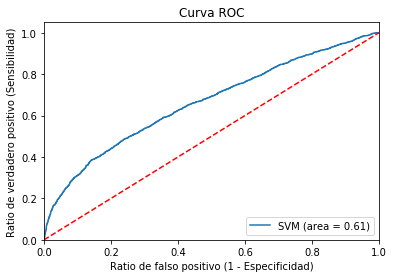

In [38]:
curva_roc = roc_auc_score(y_test, nb_modelo_1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nb_modelo_1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % curva_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falso positivo (1 - Especificidad)')
plt.ylabel('Ratio de verdadero positivo (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig('Curva_roc')
plt.show()

In [25]:
print("Gini: ",2*curva_roc-1)

Gini:  0.22088959625571447


Notamo un mejor recall que con la regresión logística y SVM, pero el AUC es muy bajo.

Usemos el algoritmo genérico de Naive Bayes, previamente hay que balancear los datos.

### Gaussian Naive Bayes¶

Primero, balancemos los datos; para ello, usaremos el método de smote.

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [31]:
y_train['incumplimiento_sgte_mes'].value_counts()

0    16305
1     4695
Name: incumplimiento_sgte_mes, dtype: int64

In [26]:
bal = SMOTE(random_state=450)
databal_X,databal_y= bal.fit_resample(X_train, y_train.values.ravel())
columns=X_train.columns.to_list()
databal_X = pd.DataFrame(data=databal_X,columns=columns )
databal_y= pd.DataFrame(data=databal_y,columns=['y'])

print("Tamaño de X_train: ",len(X_train))
print("Tamaño de bal_data_x: ",len(databal_X))

Tamaño de X_train:  21000
Tamaño de bal_data_x:  32610


In [27]:
print("cantidad de registros 0:",len(databal_y[databal_y['y']==0]))
print("cantidad de registros 1:",len(databal_y[databal_y['y']==1]))

cantidad de registros 0: 16305
cantidad de registros 1: 16305


**Aplicamos el modelo**

In [32]:
nb_modelo_2=GaussianNB()
nb_modelo_2.fit(databal_X, databal_y.values.ravel())
prediccion_2 = nb_modelo_2.predict(X_test)

**Evaluación del modelo**

In [47]:
labels = np.array([0, 1])
confusion_matrix_2 = confusion_matrix(y_test, prediccion_2, labels = labels)
pd.DataFrame(confusion_matrix_2, index = labels, columns = labels)

,0,1
0,1658,5401
1,179,1762


In [36]:
print(classification_report(y_test, prediccion_2))

              precision    recall  f1-score   support

           0       0.90      0.23      0.37      7059
           1       0.25      0.91      0.39      1941

    accuracy                           0.38      9000
   macro avg       0.57      0.57      0.38      9000
weighted avg       0.76      0.38      0.38      9000



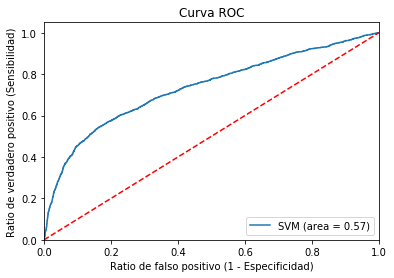

In [39]:
curva_roc_2 = roc_auc_score(y_test, nb_modelo_2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nb_modelo_2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % curva_roc_2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falso positivo (1 - Especificidad)')
plt.ylabel('Ratio de verdadero positivo (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig('Curva_roc')
plt.show()

In [40]:
print("Gini: ",2*curva_roc_2-1)

Gini:  0.14265695650241406


Podemos ver que el modelo **es muy bueno** para máximizar la **sensibilidad/recall**, pero pierde precisión, F1 score y AUC. El f2 score mejora.

**Consolidando resultados**

In [49]:
acc=(confusion_matrix_1[0][0]+confusion_matrix_1[1][1])/(confusion_matrix_1[0][0]+confusion_matrix_1[0][1]+confusion_matrix_1[1][0]+confusion_matrix_1[1][1])
acc_2=(confusion_matrix_2[0][0]+confusion_matrix_2[1][1])/(confusion_matrix_2[0][0]+confusion_matrix_2[0][1]+confusion_matrix_2[1][0]+confusion_matrix_2[1][1])
##
prec=(confusion_matrix_1[1][1])/(confusion_matrix_1[1][1]+confusion_matrix_1[0][1])
prec_2=(confusion_matrix_2[1][1])/(confusion_matrix_2[1][1]+confusion_matrix_2[0][1])
##
sens=(confusion_matrix_1[1][1])/(confusion_matrix_1[1][1]+confusion_matrix_1[1][0])
sens_2=(confusion_matrix_2[1][1])/(confusion_matrix_2[1][1]+confusion_matrix_2[1][0])
##
f1_score=2*(sens*prec)/(sens+prec)
f1_score_2=2*(sens_2*prec_2)/(sens_2+prec_2)
##
beta=2
f2_score=(1+beta**2)*((sens*prec)/(beta**2*prec+sens))
f2_score_2=(1+beta**2)*((sens_2*prec_2)/(beta**2*prec_2+sens_2))

In [52]:
Tabla=pd.DataFrame({"Etapa":["Test","Test"],"Modelo":["No balanceado","Balanceado"],"Accuracy":[acc,acc_2],"Precision":[prec,prec_2],"Sensibility":[sens,sens_2],
                    "F1 Score":[f1_score,f1_score_2],"F2 Score":[f2_score,f2_score_2],"AUC":[curva_roc,curva_roc_2],"Gini":[2*curva_roc-1,2*curva_roc_2-1]})
Tabla

,Etapa,Modelo,Accuracy,Precision,Sensibility,F1 Score,F2 Score,AUC,Gini
0,Test,No balanceado,0.587556,0.293926,0.650696,0.404937,0.523588,0.610445,0.220890
1,Test,Balanceado,0.380000,0.245986,0.907779,0.387083,0.590206,0.571328,0.142657


### FIN 